# Implementation of Feed Forward Neural Network In Python

* Feed Forward Neural Network or called Fully connected neural network is a mathematical deep learning model $\:$. 
* We have hiden Layers $h_i^{(1)}$ with $i \in [1, \cdots, i]$, weith $w_{1...i}^{(1)}$, biase $b_{1...i}^{(1)}$ $\:$.
* We need to calculate the $z_i^{(1)} = w_{1...m}^{(1)} \times X + b_{1...k}^{(1)}$ and $X = x_j$ the input $\:$.
* Then we need to calculate the activation function $a_i^{(1)} = \sigma(z_i^{(1)})$ $\:$ .
* We need to define the Nx the number of input vectors .
    * For our example : Nx = 3, HidenLayer = 4 .
    * $w_1$ is the matrix of the first hidden layer, it has a shape of `(HidenLayer, Nx) = (4, 3)` .
    * $b_1$ is the matrix of the first hidden layer, it has a shape of `(noOfHiddenNeurons,1) = (4, 1)` .
    * $z_1$ is the result of the equation $z_1 = W_1 \cdot X + b$ , it has a shape of `(noOfHiddenNeurons,1) = (4, 1)` .
    * $a_1$ is the result of the equation $a_1 = \sigma(z_1)$ , it has a shape of `(noOfHiddenNeurons,1) = (4, 1)`.
    * $w_2$ is the matrix of the second hidden layer, it has a shape of `(1,noOfHiddenNeurons) = (1, 4)`.
    * $b_2$ is the matrix of the second hidden layer, it has a shape of `(1,1)` .
    * $z_2$ is the result of the equation $z_2 = W_2 \cdot a_1 + b$ , it has a shape of `(1,1)` .
    * $a_2$ is the result of the equation $a_2 = \sigma(z_2)$ , it has a shape of `(1,1)` .


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
HidenLayer = 4
Nx = 3
m = 100  # Assuming 'm' is the number of data samples

In [2]:
# Define the shapes of the variables
W1_shape = (HidenLayer, Nx)
b1_shape = (HidenLayer, 1)
W2_shape = (1, HidenLayer)
b2_shape = (1, 1)

In [3]:
# Initialize the variables (optional, based on your use case)
W1 = np.random.randn(*W1_shape)  # Assuming you want to initialize with random values
b1 = np.random.randn(*b1_shape)
W2 = np.random.randn(*W2_shape)
b2 = np.random.randn(*b2_shape)

In [4]:
# Sample data for x (optional, based on your use case)
x = np.random.randn(Nx, m)

In [5]:
# Initialize arrays to store z and a for each data sample
z1 = np.zeros((HidenLayer, m))
a1 = np.zeros((HidenLayer, m))
z2 = np.zeros((1, m))
a2 = np.zeros((1, m))

In [6]:
# Print the shapes of z and a
print("z1 shape:", z1.shape)
print("a1 shape:", a1.shape)
print("z2 shape:", z2.shape)
print("a2 shape:", a2.shape)

z1 shape: (4, 100)
a1 shape: (4, 100)
z2 shape: (1, 100)
a2 shape: (1, 100)


* If you notice always $m$ is the number of columns.

In [7]:
# Calculate z and a for each data sample

for i in range(m):
    z1[:, i] = np.dot(W1, x[:, i]) + b1[:, 0]
    a1[:, i] = 1 / (1 + np.exp(-z1[:, i]))
    z2[:, i] = np.dot(W2, a1[:, i]) + b2[:, 0]
    a2[:, i] = 1 / (1 + np.exp(-z2[:, i]))

### Activation function $f(x)$ :

* Let note that we used `sigmoid` `function` $\sigma(x) = \frac{1}{1+e^{-x}}$ .
    * But we can use other type of functions (depend on wich case we are in) .
    * Sigmoid can lead us to gradient decent problem where the updates are so low .
    * Sigmoid activation function range is $[0,1],\: A = 1 / (1 + np.exp(-z))$ Where $z$ is the input matrix .

* $\tanh$ activation function range is $[-1,1]$ : 
    * In $NumPy$ we can implement $\tanh$ using one of these methods: $A = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))$ Where $z$ is the input matrix Or $A = np.tanh(z)$ Where z is the input matrix .
    * It turns out that the tanh activation usually works better than sigmoid activation function for hidden units because the mean of its output is closer to zero, and so it centers the data better for the next layer.
    * Sigmoid or Tanh function disadvantage is that if the input is too small or too high, the slope will be near zero which will cause us the gradient decent problem.

* One of the popular `activation` functions that solved the slow `gradient decent` is the `RELU function`. $RELU = max(0,z)$  so if $z$ is negative the slope is $0$ and if $z$ is positive the slope remains linear.
    * So here is some basic rule for choosing activation functions, if your classification is between 0 and 1, use the output activation as sigmoid and the others as `RELU`.
    * Leaky `RELU` `activation` `function` different of `RELU` is that if the input is negative the slope will be so small. It works as `RELU` but most people uses `RELU`. $Leaky_RELU = max(0.01z,z)$ the $0.01$ can be a parameter for your algorithm.

### Sigmoid activation function :

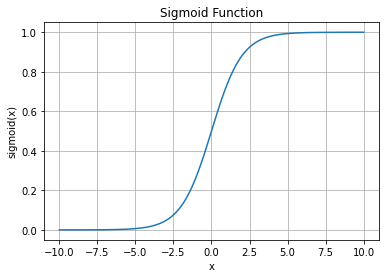

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

axe_x_sigm = np.linspace(-10, 10, 1000)
axe_y_sigm = sigmoid(axe_x_sigm)
plt.plot(axe_x_sigm, axe_y_sigm)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

We notice that This `sigmoid function` is between $[0, 1]$ .

### tanh activation function :

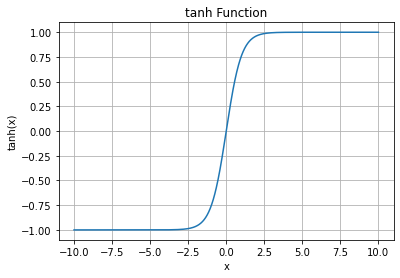

In [9]:
def tanh(x):
    return np.tanh(x)

axe_x_th = np.linspace(-10, 10, 1000)
axe_y_th = tanh(axe_x_th)
plt.plot(axe_x_th, axe_y_th)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('tanh Function')
plt.grid(True)
plt.show()

We notice that This `tanh function` is between $[-1, 1]$ .

### ReLu activation function :

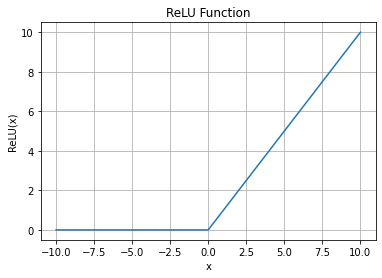

In [10]:
def ReLU(x):
    return np.maximum(0, x)

axe_x_relu = np.linspace(-10, 10, 1000)
axe_y_relu = ReLU(axe_x_relu)
plt.plot(axe_x_relu, axe_y_relu)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Function')
plt.grid(True)
plt.show()

## Gradient descent For FFNN : 

* In `logistic regression` it wasn't important to initialize the `weights` randomly, whil in `NN` we have to initialize them randomly .
* If we initialize the `weight` with `0` it won't work, for the `biases` it's ok . 
    * all hidden units will be completely identical (symmetric) - compute exactly the same function .
    * on each gradient descent iteration all the hidden units will always update the same .

In [20]:
w1 = np.random.randn(2, 2) * 0.01
b1 = np.zeros((2,1)) 